
# Derivative (미분)

미분은 함수의 변화량을 나타내는 것으로, **한 점에서의 기울기**를 의미합니다. 미분을 통해 함수의 극대점, 극소점, 변화율 등을 구할 수 있습니다.

미분의 정의는 다음과 같습니다.

$$
f'(x) = \lim_{\Delta x \to 0} \frac{f(x+\Delta x) - f(x)}{\Delta x}
$$

여기서,
- $f'(x)$는 함수 $f(x)$의 미분계수를 의미합니다.
- $\Delta x$는 $x$의 변화량을 의미합니다.
- $lim_{\Delta x \to 0}$는 $\Delta x$가 0으로 수렴하는 극한값을 의미합니다.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, lambdify


def visualize():
    plt.axhline(0, color="black", linewidth=0.8, linestyle="--")
    plt.axvline(0, color="black", linewidth=0.8, linestyle="--")
    plt.grid(True, alpha=0.3)
    plt.xlabel(r"$x$")
    plt.ylabel(r"$y$")
    plt.legend()
    plt.show()

기울기(Slope)는 두 점 사이의 세로 변화량($\Delta y$)을 가로 변화량($\Delta x$)으로 나눈 값이다. 수식으로는 다음과 같다. m 은 기울기를 의미한다.

$$
m = \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1}
$$

그런데 '한 점에서의 기울기'라니, 말이 안되는 것처럼 보인다. 그래프를 그려가면서 확인해보자.

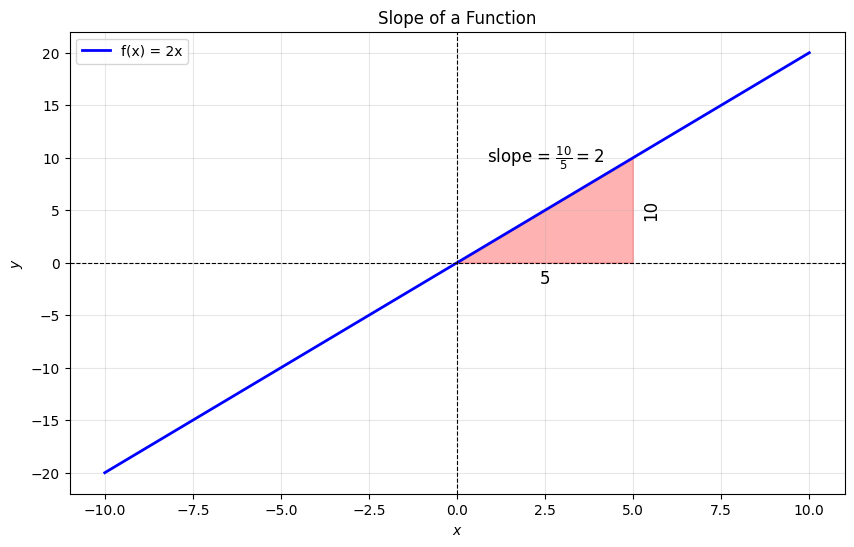

In [2]:
# 기울기에 대한 설명 그래프
# 기울기 = x의 변화량 / y의 변화량
x = np.linspace(-10, 10, 500)
y = 2 * x

plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x) = 2x", color="blue", linewidth=2)
plt.title("Slope of a Function")
# 0 <= x <= 5 직선 구간을 붉게 표시하고 10 / 5 = 2로 기울기를 표시
plt.fill_between(x, y, where=(x >= 0) & (x <= 5), color="red", alpha=0.3)

# x축 범위 0 <= x <= 5에 5라는 숫자를 표시
plt.text(2.5, -1.5, '5', ha='center', va='center', fontsize=12, color='black')  # x축 아래 표시

# y축 범위 0 <= y <= 10에 10이라는 숫자를 표시
plt.text(5.5, 5, '10', ha='center', va='center', fontsize=12, color='black', rotation=90)  # y축 왼쪽 표시

# 기울기 2를 표시
plt.text(2.5, 10, r'slope = $\frac{10}{5} = 2$', ha='center', va='center', fontsize=12, color='black')

visualize()

1차 방정식은 직선이므로 쉽게 기울기를 구할 수 있다. 문제는 다항 방정식의 경우다.

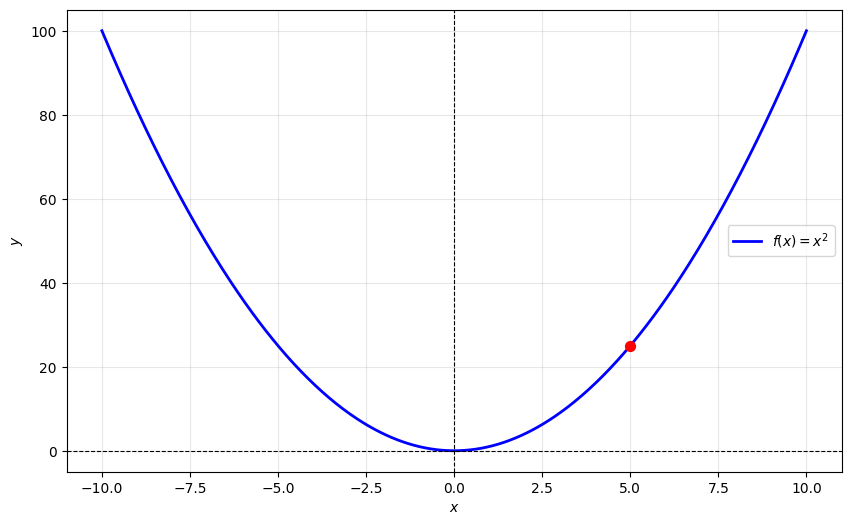

In [3]:
# 2차 방정식 그래프
x = np.linspace(-10, 10, 500)
y = x ** 2

x_target = 5
y_target = x_target ** 2

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r"$f(x) = x^2$", color="blue", linewidth=2)
plt.scatter(x_target, y_target, color="red", s=50, zorder=5)

visualize()

위 2차 방정식 $f(x) = x^2$에서 $x=5$일 때의 기울기를 구하려면 어떻게 해야 할까? 이때 미분을 사용한다.

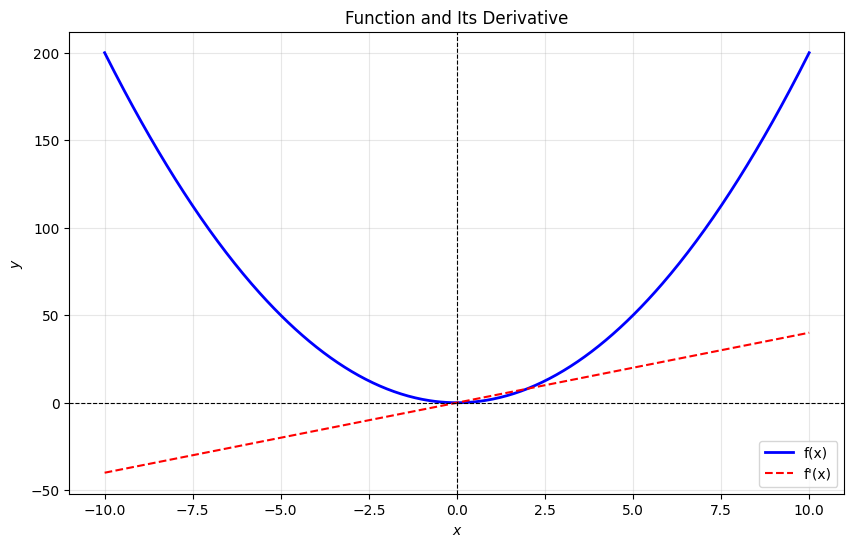

In [4]:
# 함수 정의
def f(x):
    return 2 * x ** 2


# 수치 미분 함수 정의
def numerical_derivative(f, x, h=1e-5):
    return (f(x + h) - f(x)) / h


# x 데이터 생성
x = np.linspace(-10, 10, 500)  # -10부터 10까지 500개의 점 데이터

# 함수와 미분계수 계산
y = f(x)
dy = numerical_derivative(f, x)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="f(x)", color="blue", linewidth=2)
plt.plot(x, dy, label="f'(x)", color="red", linestyle="--")
plt.title("Function and Its Derivative")

visualize()

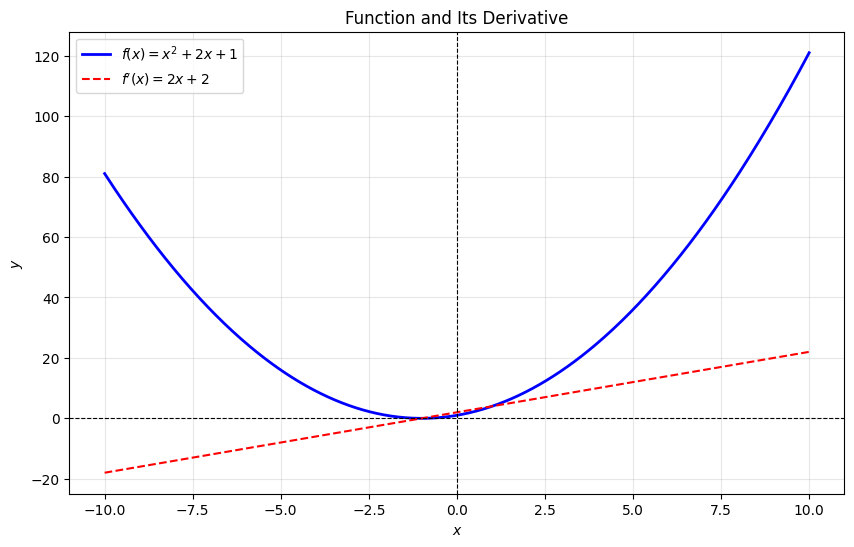

In [5]:
x = symbols('x')
func = x ** 2 + 2 * x + 1  # f(x) = x^2 + 2x + 1
func_derivative = diff(func, x)  # f'(x) = 2x + 2, 미분

# NumPy 함수로 변환
f = lambdify(x, func, 'numpy')
f_prime = lambdify(x, func_derivative, 'numpy')  # 미분된 함수

# x 데이터 생성
x_vals = np.linspace(-10, 10, 500)
y_vals = f(x_vals)
y_prime_vals = f_prime(x_vals)

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r"$f(x) = x^2 + 2x + 1$", color="blue", linewidth=2)
plt.plot(x_vals, y_prime_vals, label=r"$f'(x) = 2x + 2$", color="red", linestyle="--")
plt.title("Function and Its Derivative")
plt.xlabel(r"$x$")
plt.ylabel("y")

visualize()

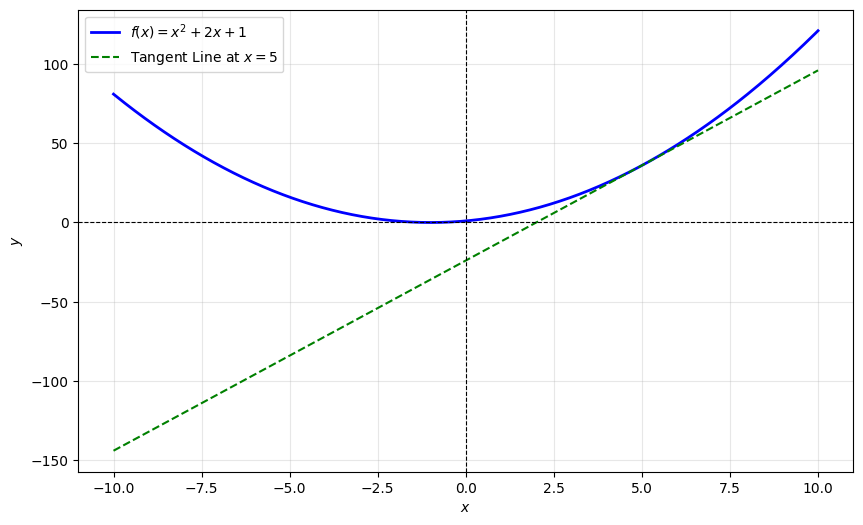

In [6]:
# 특정 점에서의 접선 표시
x_point = 5
y_point = f(x_point)
slope = f_prime(x_point)
tangent_line = lambda x: slope * (x - x_point) + y_point  # 접선의 방정식

tangent_vals = tangent_line(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label=r"$f(x) = x^2 + 2x + 1$", color="blue", linewidth=2)
plt.plot(x_vals, tangent_vals, label=r"Tangent Line at $x=5$", color="green", linestyle="--")

visualize()